In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append('..')
from synthetic_experiments import viz
from synthetic_experiments.config import ErrorPerturbationExperimentConfig, ElicitationErrorPrevalenceExperimentConfig

In [ ]:
cfg = ErrorPerturbationExperimentConfig(
    n_judges=50,
    n_trials=1,
    resp_set_configs=[(100,3,3), (100,3,5)],
    judge_eps_min = 0.02,
    judge_eps_max = 0.5,
    error_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    rating_process_configs = [{
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 0,
            'judge_beta': 0, 
            'skew': 0,
        }, {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 1,
            'judge_beta': 2,
            'skew': 0
        }, {
            'human_order': 'increasing',
            'judge_order': 'decreasing', 
            'human_beta': 2,
            'judge_beta': 1,
            'skew': 0
        }, {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 0,
            'judge_beta': 0, 
            'skew': 1,
        }, {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 1,
            'judge_beta': 2,
            'skew': 1
        }, {
            'human_order': 'increasing',
            'judge_order': 'decreasing', 
            'human_beta': 2,
            'judge_beta': 1,
            'skew': 1
        },{
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 0,
            'judge_beta': 0, 
            'skew': -1
        }, {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 1,
            'judge_beta': 2,
            'skew': -1
        }, {
            'human_order': 'increasing',
            'judge_order': 'decreasing', 
            'human_beta': 2,
            'judge_beta': 1,
            'skew': -1
        }]
)

## Figure 36: Joint effects of forced choice selection and rater error on the reliability of HR (h/h). 

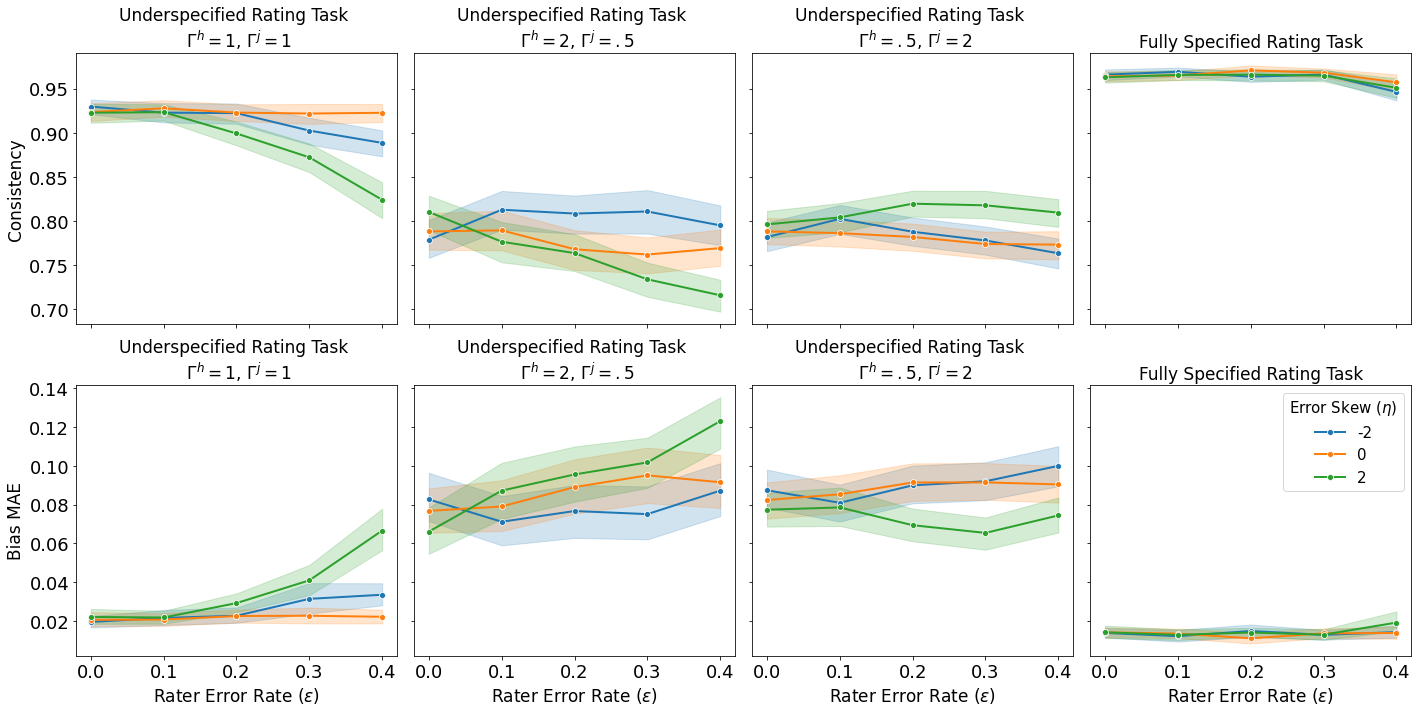

In [2]:
dfa = pd.read_csv('results/error_forced_choice_ablation_specified.csv')
dfb = pd.read_csv('results/error_forced_choice_ablation_underspecified.csv')
df = pd.concat([dfa,dfb])
fig = viz.plot_error_hr_ablation_exp(df)
plt.savefig('figures/error_ablation.pdf', dpi=400)


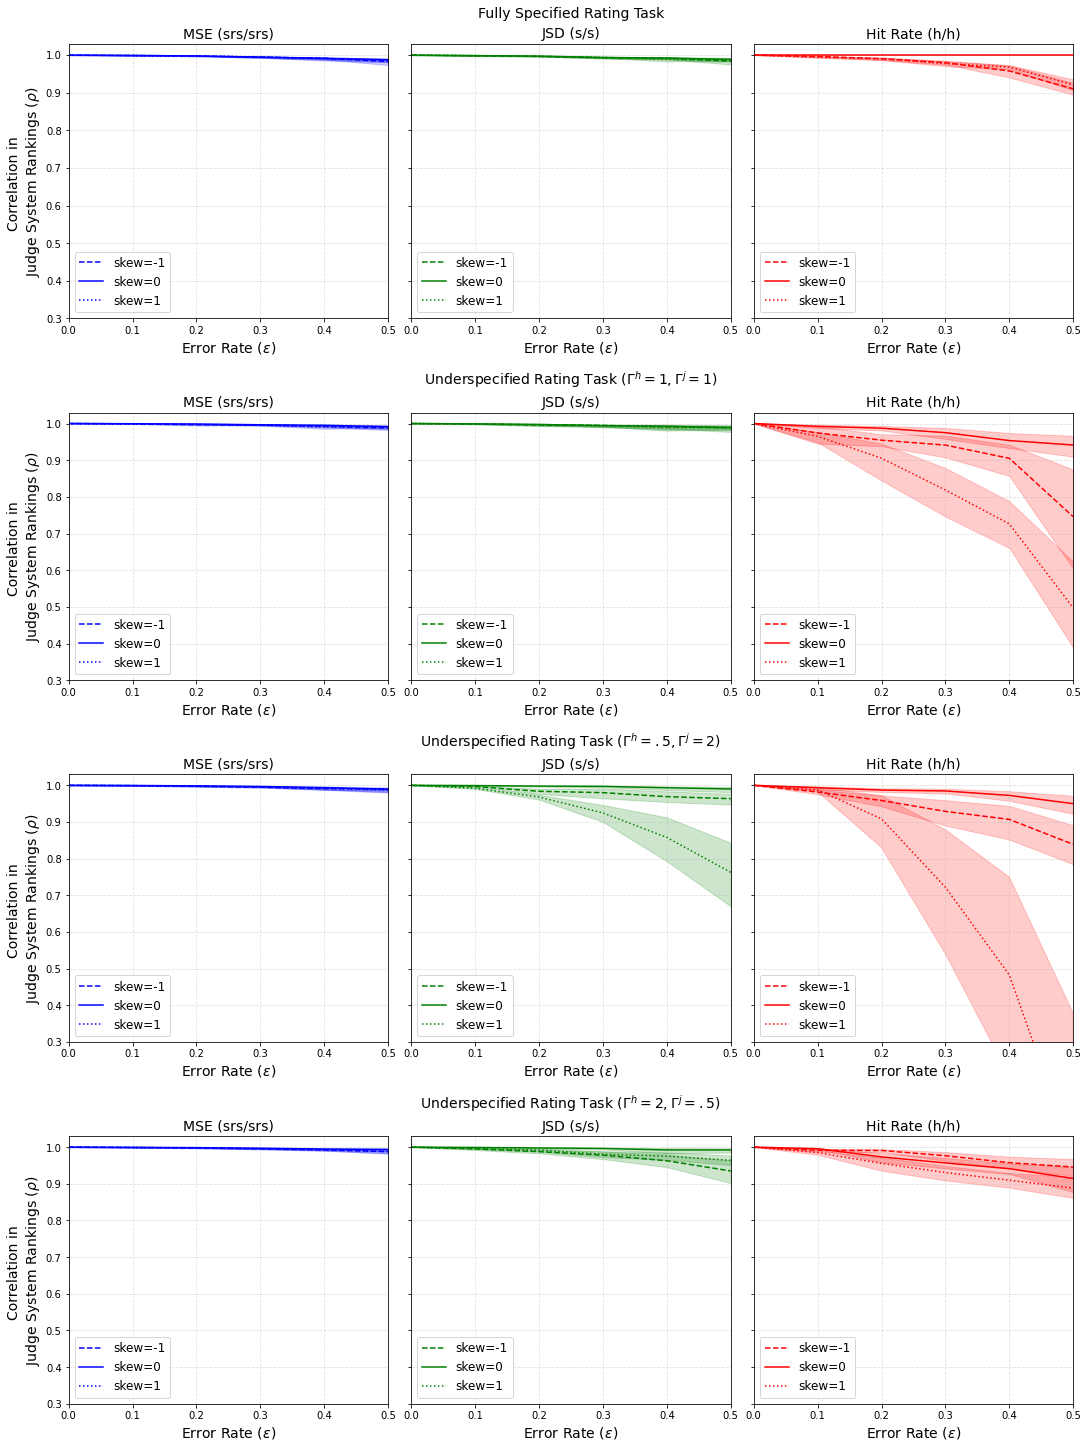

In [7]:
results = pd.read_csv('results/rater_error_rank_robustness_test.csv')
fig = viz.plot_error_ranking_corr_results(results)
plt.savefig('figures/obs_target_corr_exp_judge_flips.pdf', dpi=400)

In [13]:
cfg = ElicitationErrorPrevalenceExperimentConfig(
    n_trials=5,
    resp_set_configs=[(100,2,3), (100,3,5),  (100,3,7), (100,4,7),  (100,4,8),(100,4,14),
                (100,4,10), (100,4,12), (100,5,8), (100,5,12), (100,5,18),(100,5,20),
                    (100,4,5), (100,4,6), (100,4,9), (100,4,11), (100,5,9),(100,5,6),
                    (100,5,22),(100,3,3), (100,4,4), (100,5,5), (100,5,24), (100,6,6),
                    (100,6,8),(100,6,10), (100,6,11), (100,6,12),(100,6,13), (100,6,14),
                    (100,6,16),(100,6,17), (100,6,18),(100,6,19),(100,6,20),(100,6,22),
                    (100,7,16),(100,7,17), (100,7,18),(100,7,19),(100,7,20),(100,7,22),
                    (100,8,9),(100,8,12), (100,8,14),(100,8,16),(100,8,20),(100,8,22),(100,8,24),
                    (100,10,12),(100,10,14), (100,10,16),(100,10,18),(100,10,18),(100,10,20),(100,10,16),
                    (100,6,24), (100,6,26), (100,6,28), (100,6,30)],
    error_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    taus=[.25, .35, .45],
    rating_process_configs = [{
            'human_order': 'decreasing',
            'human_beta': 0, 
            'skew': 0,
        }, {
            'human_order': 'decreasing', 
            'human_beta': 1,
            'skew': 0
        }, {
            'human_order': 'increasing',
            'human_beta': 2,
            'skew': 0
        }, {
            'human_order': 'decreasing',
            'human_beta': 0,
            'skew': 1,
        }, {
            'human_order': 'decreasing',
            'human_beta': 1,
            'skew': 1
        }, {
            'human_order': 'increasing',
            'human_beta': 2,
            'skew': 1
        },{
            'human_order': 'decreasing',
            'human_beta': 0,
            'skew': -1
        }, {
            'human_order': 'decreasing',
            'human_beta': 1,
            'skew': -1
        }, {
            'human_order': 'increasing',
            'human_beta': 2,
            'skew': -1
        }]
)
# results = exp.elicitation_error_prevalence_exp(cfg)
# results.to_csv('results/prevalence_estimation_error.csv')


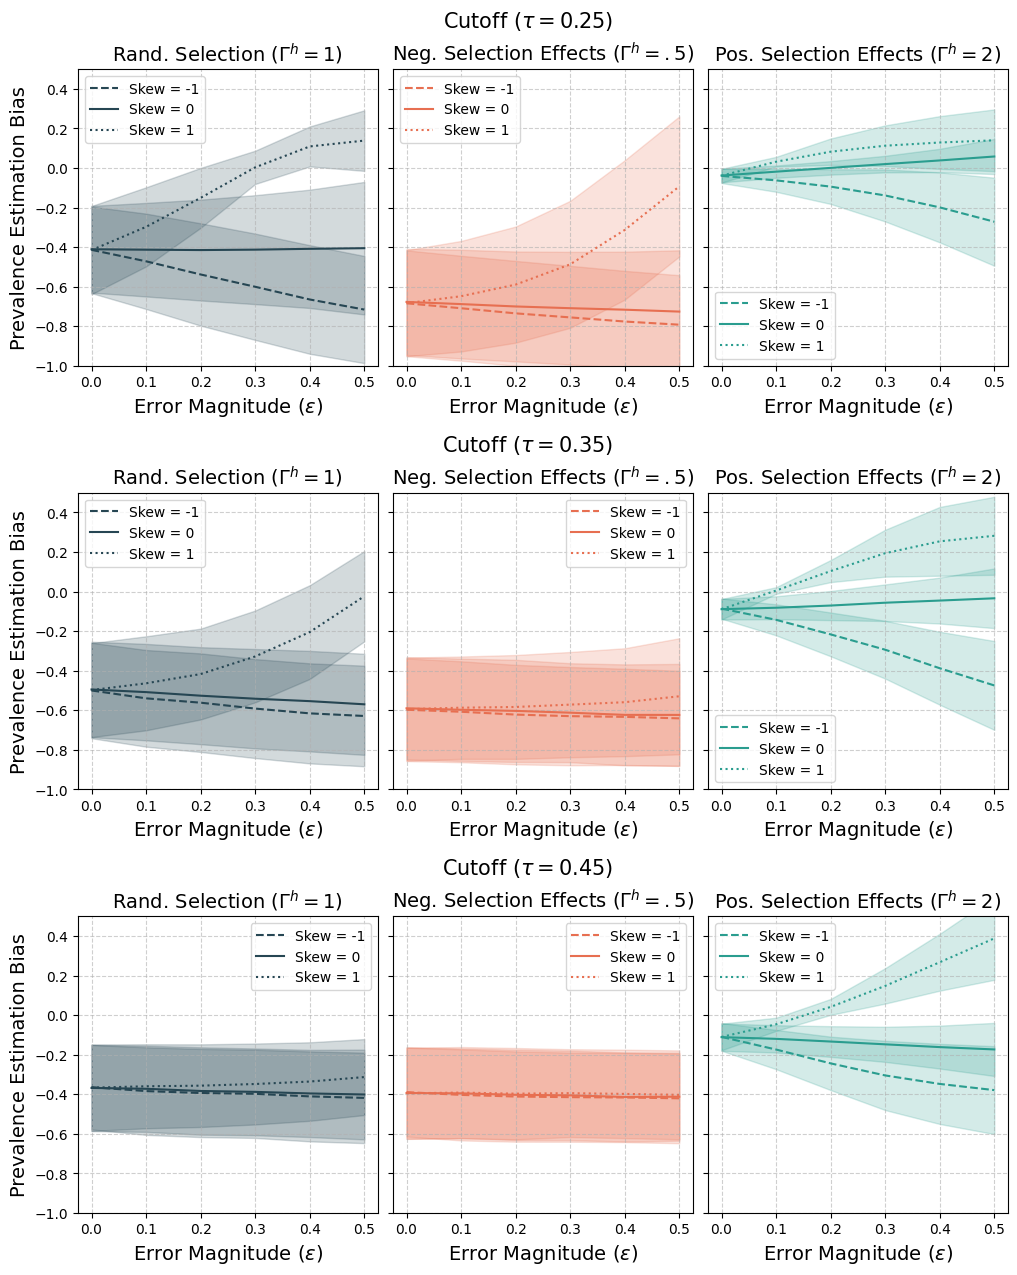

In [15]:
results = pd.read_csv('../results/prevalence_estimation_error.csv')
fig = viz.elicitation_error_prevalence_exp(results, cfg)

# Save the figure if needed
plt.savefig('../figures/prevalence_estimation_bias_error.pdf', dpi=400, bbox_inches='tight')

plt.show()